In [ ]:
# African Americans have a higher prevalance of diabetes than any other race.
# if African Americans have the highest prevalance of diabetes then  public health policies should be mirror that
# if not then the highest then reject the hypothesis

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import io
from google.colab import files
import math
import seaborn as sns
import re

In [ ]:
!pip install google
!pip install file

  Using cached file-0.3.0.tar.gz (15 kB)
  ERROR: Failed building wheel for file
  Running setup.py clean for file
Failed to build file
    Running setup.py install for file ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-c0dcqfl3/file_e2487da4aef7491d8b8c2e7a8ebf5a33/setup.py'"'"'; __file__='"'"'/tmp/pip-install-c0dcqfl3/file_e2487da4aef7491d8b8c2e7a8ebf5a33/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-cva1icjb/install-record.txt --single-version-externally-managed --compile --install-headers /usr/local/include/python3.7/file Check the logs for full command output.


In [ ]:

uploaded = files.upload()



Saving Selected_Trend_Table_from_Health__United_States__2011._Diabetes_prevalence_and_glycemic_control_among_adults_20_years_of_age_and_over__by_sex__age__and_race_and_Hispanic_origin__United_States__selected_years_1988_-.csv to Selected_Trend_Table_from_Health__United_States__2011._Diabetes_prevalence_and_glycemic_control_among_adults_20_years_of_age_and_over__by_sex__age__and_race_and_Hispanic_origin__United_States__selected_years_1988_-.csv


SyntaxError: ignored

In [ ]:
# using this dataset I can decipher the diagnosised diabetes for the races within the United States between the years 2003-2006
#using this data can help improve biases within the general public.

In [ ]:

df = pd.read_csv(io.BytesIO(uploaded['Selected_Trend_Table_from_Health__United_States__2011._Diabetes_prevalence_and_glycemic_control_among_adults_20_years_of_age_and_over__by_sex__age__and_race_and_Hispanic_origin__United_States__selected_years_1988_-.csv']))
df.head()



,Category,Category flag,Group,Group flag,Prevalence,Prevalence note,Prevalence flag 1,Prevalence flag 2,1988-1994,1988-1994 flag,1988-1994 SE,1988-1994 SE flag,1999-2002,1999-2002 flag,1999-2002 SE,1999-2002 SE flag,2001-2004,2001-2004 flag,2001-2004 SE,2001-2004 SE flag,2003-2006,2003-2006 flag,2003-2006 SE,2003-2006 SE flag
0,All persons,5.0,"20 years and over, age-adjusted",4.0,Physician-diagnosed and undiagnosed diabetes,Percent of population,1.0,2.0,9.1,NaN,0.4,NaN,9.8,NaN,0.4,NaN,10.7,NaN,0.5,NaN,10.6,NaN,0.5,NaN
1,Male,NaN,"20 years and over, age-adjusted",4.0,Physician-diagnosed and undiagnosed diabetes,Percent of population,1.0,2.0,9.6,NaN,0.4,NaN,10.8,NaN,0.6,NaN,12.0,NaN,0.7,NaN,11.5,NaN,0.7,NaN
2,Female,NaN,"20 years and over, age-adjusted",4.0,Physician-diagnosed and undiagnosed diabetes,Percent of population,1.0,2.0,8.7,NaN,0.6,NaN,8.8,NaN,0.5,NaN,9.5,NaN,0.5,NaN,9.8,NaN,0.5,NaN
3,Not Hispanic or Latino: White only,NaN,"20 years and over, age-adjusted",4.0,Physician-diagnosed and undiagnosed diabetes,Percent of population,1.0,2.0,8.0,NaN,0.4,NaN,8.3,NaN,0.4,NaN,9.1,NaN,0.5,NaN,9.0,NaN,0.6,NaN
4,Not Hispanic or Latino: Black or African Ameri...,NaN,"20 years and over, age-adjusted",4.0,Physician-diagnosed and undiagnosed diabetes,Percent of population,1.0,2.0,16.0,NaN,0.7,NaN,16.3,NaN,1.0,NaN,15.4,NaN,0.9,NaN,16.4,NaN,0.9,NaN


In [ ]:
df.info
df.isnull()



,Category,Category flag,Group,Group flag,Prevalence,Prevalence note,Prevalence flag 1,Prevalence flag 2,1988-1994,1988-1994 flag,1988-1994 SE,1988-1994 SE flag,1999-2002,1999-2002 flag,1999-2002 SE,1999-2002 SE flag,2001-2004,2001-2004 flag,2001-2004 SE,2001-2004 SE flag,2003-2006,2003-2006 flag,2003-2006 SE,2003-2006 SE flag
0,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True
1,False,True,False,False,False,False,False,False,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True
2,False,True,False,False,False,False,False,False,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True
3,False,True,False,False,False,False,False,False,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True
4,False,True,False,False,False,False,False,False,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,False,False,False,False,False,False,True,True,False,False,False,True,False,True,False,True,False,True,False,True,False,False,False,True
92,False,False,False,False,False,False,True,True,False,False,False,True,True,False,True,False,False,True,False,True,False,True,False,True
93,False,True,False,False,False,False,True,True,False,True,False,True,False,False,False,True,False,False,False,True,False,True,False,True
94,False,True,False,False,False,False,True,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True


In [ ]:
df_clean = df.dropna(axis = 0 , how = 'all')
print("old data length is:", 
      len(df), '\nNew data length is :', 
      len(df_clean), 
      '\nRows with a NAN value:', len(df)-len(df_clean))

old data length is: 96 
New data length is : 96 
Rows with a NAN value: 0


In [ ]:
res = []
for val in df:
  if val != 'NaN':
    res.append(val)
print('the list after removing null values:', (df))


the list after removing null values:                                              Category  ...  2003-2006 SE flag
0                                         All persons  ...                NaN
1                                                Male  ...                NaN
2                                              Female  ...                NaN
3                  Not Hispanic or Latino: White only  ...                NaN
4   Not Hispanic or Latino: Black or African Ameri...  ...                NaN
..                                                ...  ...                ...
91                Percent of poverty level: 200%-399%  ...                NaN
92             Percent of poverty level: 400% or more  ...                NaN
93                                        20-44 years  ...                NaN
94                                        45-64 years  ...                NaN
95                                  65 years and over  ...                NaN

[96 rows x 24 columns]


In [ ]:
high_prevalance = df[(df['2003-2006'] > 16.4)]
high_prevalance.info()
high_prevalance.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 26 to 94
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Category           7 non-null      object 
 1   Category flag      1 non-null      float64
 2   Group              7 non-null      object 
 3   Group flag         5 non-null      float64
 4   Prevalence         7 non-null      object 
 5   Prevalence note    7 non-null      object 
 6   Prevalence flag 1  2 non-null      float64
 7   Prevalence flag 2  1 non-null      float64
 8   1988-1994          7 non-null      float64
 9   1988-1994 flag     0 non-null      object 
 10  1988-1994 SE       7 non-null      float64
 11  1988-1994 SE flag  0 non-null      float64
 12  1999-2002          7 non-null      float64
 13  1999-2002 flag     1 non-null      object 
 14  1999-2002 SE       7 non-null      float64
 15  1999-2002 SE flag  0 non-null      object 
 16  2001-2004          7 non-nul

,Category,Category flag,Group,Group flag,Prevalence,Prevalence note,Prevalence flag 1,Prevalence flag 2,1988-1994,1988-1994 flag,1988-1994 SE,1988-1994 SE flag,1999-2002,1999-2002 flag,1999-2002 SE,1999-2002 SE flag,2001-2004,2001-2004 flag,2001-2004 SE,2001-2004 SE flag,2003-2006,2003-2006 flag,2003-2006 SE,2003-2006 SE flag
26,65 years and over,NaN,"20 years and over, crude",NaN,Physician-diagnosed and undiagnosed diabetes,Percent of population,1.0,2.0,19.6,NaN,1.0,NaN,22.4,NaN,1.3,NaN,26.4,NaN,1.6,NaN,25.7,NaN,1.8,NaN
53,65 years and over,NaN,"20 years and over, crude",NaN,Physician-diagnosed diabetes,Percent of population,1.0,NaN,12.9,NaN,0.6,NaN,15.8,NaN,1.0,NaN,18.1,NaN,1.2,NaN,18.3,NaN,1.1,NaN
85,Not Hispanic or Latino: Black or African Ameri...,NaN,"20 years and over, crude",7.0,Poor glycemic control (A1c greater than 9%) am...,Percent of population with diagnosed diabetes,NaN,NaN,34.2,NaN,2.9,NaN,25.4,NaN,2.8,NaN,20.0,NaN,2.6,NaN,21.0,NaN,2.6,NaN
86,Mexican,NaN,"20 years and over, crude",7.0,Poor glycemic control (A1c greater than 9%) am...,Percent of population with diagnosed diabetes,NaN,NaN,29.2,NaN,3.2,NaN,26.5,NaN,3.5,NaN,22.9,NaN,3.4,NaN,24.0,NaN,3.2,NaN
87,Percent of poverty level: Below 100%,6.0,"20 years and over, crude",7.0,Poor glycemic control (A1c greater than 9%) am...,Percent of population with diagnosed diabetes,NaN,NaN,30.2,NaN,3.5,NaN,25.6,NaN,3.6,NaN,16.3,NaN,2.9,NaN,17.6,NaN,3.4,NaN


In [ ]:
low_prevalance = df[(df['2003-2006'] < 16.4)]
low_prevalance.info()
low_prevalance.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85 entries, 0 to 95
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Category           85 non-null     object 
 1   Category flag      45 non-null     float64
 2   Group              85 non-null     object 
 3   Group flag         43 non-null     float64
 4   Prevalence         85 non-null     object 
 5   Prevalence note    85 non-null     object 
 6   Prevalence flag 1  75 non-null     float64
 7   Prevalence flag 2  25 non-null     float64
 8   1988-1994          85 non-null     float64
 9   1988-1994 flag     4 non-null      object 
 10  1988-1994 SE       85 non-null     float64
 11  1988-1994 SE flag  0 non-null      float64
 12  1999-2002          83 non-null     float64
 13  1999-2002 flag     8 non-null      object 
 14  1999-2002 SE       83 non-null     float64
 15  1999-2002 SE flag  2 non-null      object 
 16  2001-2004          85 non-nu

,Category,Category flag,Group,Group flag,Prevalence,Prevalence note,Prevalence flag 1,Prevalence flag 2,1988-1994,1988-1994 flag,1988-1994 SE,1988-1994 SE flag,1999-2002,1999-2002 flag,1999-2002 SE,1999-2002 SE flag,2001-2004,2001-2004 flag,2001-2004 SE,2001-2004 SE flag,2003-2006,2003-2006 flag,2003-2006 SE,2003-2006 SE flag
0,All persons,5.0,"20 years and over, age-adjusted",4.0,Physician-diagnosed and undiagnosed diabetes,Percent of population,1.0,2.0,9.1,NaN,0.4,NaN,9.8,NaN,0.4,NaN,10.7,NaN,0.5,NaN,10.6,NaN,0.5,NaN
1,Male,NaN,"20 years and over, age-adjusted",4.0,Physician-diagnosed and undiagnosed diabetes,Percent of population,1.0,2.0,9.6,NaN,0.4,NaN,10.8,NaN,0.6,NaN,12.0,NaN,0.7,NaN,11.5,NaN,0.7,NaN
2,Female,NaN,"20 years and over, age-adjusted",4.0,Physician-diagnosed and undiagnosed diabetes,Percent of population,1.0,2.0,8.7,NaN,0.6,NaN,8.8,NaN,0.5,NaN,9.5,NaN,0.5,NaN,9.8,NaN,0.5,NaN
3,Not Hispanic or Latino: White only,NaN,"20 years and over, age-adjusted",4.0,Physician-diagnosed and undiagnosed diabetes,Percent of population,1.0,2.0,8.0,NaN,0.4,NaN,8.3,NaN,0.4,NaN,9.1,NaN,0.5,NaN,9.0,NaN,0.6,NaN
5,Mexican,NaN,"20 years and over, age-adjusted",4.0,Physician-diagnosed and undiagnosed diabetes,Percent of population,1.0,2.0,14.9,NaN,1.1,NaN,13.2,NaN,0.7,NaN,15.2,NaN,1.0,NaN,16.3,NaN,1.2,NaN


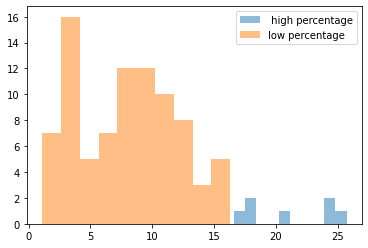

In [ ]:
# those with a high prevalance in 2003- 2006 are also African Americans or is it false?
plt.hist(high_prevalance['2003-2006'], alpha = .5 ,label = ' high percentage')
plt.hist(low_prevalance['2003-2006'], alpha = .5 ,label = 'low percentage')
plt.legend( loc = 'upper right')

In [ ]:
print(stats.describe(high_prevalance['2003-2006']))
print(stats.describe(low_prevalance['2003-2006']))


DescribeResult(nobs=7, minmax=(16.6, 25.7), mean=21.128571428571426, variance=13.812380952380943, skewness=0.018671706179406746, kurtosis=-1.6678967715567348)
DescribeResult(nobs=85, minmax=(1.1, 16.3), mean=7.9399999999999995, variance=15.56195238095238, skewness=0.10955778013740235, kurtosis=-1.055108882630268)


In [ ]:
# the skewnessis between -3 and 3, the kurtosis is also between -3 and 3 so we can continue with the t- test
# before testing the for a t-test I must check and see if there's any null values within the dataset

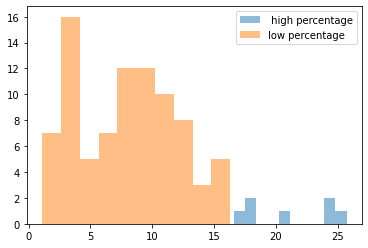

In [ ]:
filtered_high_prevalance = high_prevalance[high_prevalance['2003-2006'] != 0]
filtered_low_prevalance = low_prevalance[low_prevalance['2003-2006']!= 0]
plt.hist (high_prevalance['2003-2006'], alpha = .5, label = ' high percentage')
plt.hist(low_prevalance['2003-2006'], alpha = .5 , label = 'low percentage')
plt.legend( loc = 'upper right')
plt.show()

In [ ]:
# the dataset is the exact copy of the the previous graph so there was no zero values.


In [ ]:
stats.ttest_ind(high_prevalance['2003-2006'], low_prevalance['2003-2006'])

Ttest_indResult(statistic=8.534222277357786, pvalue=3.200191932378723e-13)

In [ ]:
# since the statistic > 1.96 and the pvalue > 1.96 then we reject the null hypothesis and accept the hypothesis.
# now I have to test the 95% confidence interval.

In [ ]:
def confidencei(high_prevalance, low_prevalance):
  high_prevalance_n = high_prevalance.shape[0]
  low_prevalance_n = low_prevalance.shape[0]
  high_prevalance_mean = high_prevalance.mean()
  low_prevalance_mean = low_prevalance.mean()
  high_prevalance_var = high_prevalance.var()
  low_prevalance_var = low_prevalance.var()
  mean_difference = low_prevalance_mean - high_prevalance_mean
  std_error = math.sqrt((high_prevalance_var/ high_prevalance_n) + (low_prevalance_var/ low_prevalance_n))
  margin_of_error = 1.96* std_error
  ci_lower = mean_difference - margin_of_error
  ci_upper = mean_difference + margin_of_error
  return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")
confidencei(high_prevalance['2003-2006'], low_prevalance['2003-2006'])


'The difference in means at the 95% confidence interval (two-tail) is between -16.066689160973738 and -10.310453696169114.'

In [ ]:
# these values show where 95% of the values lie between 16.06 and 10.31 which means the African American value of 16.4 is an outlier 
# this also shows that African Americans have unusually higher levels of diabetes comparatively to anyother race.